# StatLineTable plot voorbeeld

Hier geven we een voorbeeld hoe je makkelijk met een Python script data van statlijn kan halen en een plot in CBS stijl kan maken. 

We maken gebruik van de *StatLineTable* klasse uit de *cbs_utils.readers* sectie. Deze klasse is een toevoeging op de *cbsodata* module. Met *StatLineTable* kan je de data in een gestructureede pandas dataframe stoppen, zodat het bewerken en plotten een stuk eenvoudiger gaat. 

We beginnen met het inladen van de benodigde modules

In [1]:
import matplotlib.pyplot as plt
import logging
import sys
from cbs_utils.misc import (create_logger, merge_loggers)
from cbs_utils.plotting import CBSPlotSettings
from cbs_utils.readers import StatLineTable

Nu initialiseren we eerst de logger en ook de plot settings. Daar gebruiken we wat utilties uit cbs_utils voor

In [2]:
fig_properties = CBSPlotSettings()


logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO, stream=sys.stdout)
logger = logging.getLogger()

## Inlezen van een OpenData Tabel

Het inladen van een tabel uit opendata is eenvoudig. We moeten eerst de ID van een tabel vinden door naar statline te gaan en je tabel te openen. Bijvoorbeeld, het ICT gebruik van bedrijven in 2018 naar bedrijfsgrootte staat in deze tabel

https://opendata.cbs.nl/#/CBS/nl/dataset/84410NED/table?ts=1568706226304

Dit betekent dat de tabel ID '84410NED' is. Deze gaan we nu inlezen

In [3]:

table_id = "84410NED"
logger.info(f"Start met het lezen van tabel {table_id}")

2019-09-18 10:59:45,417 | INFO : Start met het lezen van tabel 84410NED


In [4]:
%%time
statline = StatLineTable(table_id=table_id)

2019-09-18 10:59:45,438 | INFO : Reading json cache/84410NED/DataProperties.json
2019-09-18 10:59:45,444 | INFO : Reading json cache/84410NED/TypedDataSet.json
2019-09-18 10:59:45,447 | INFO : Reading json cache/84410NED/TableInfos.json
2019-09-18 10:59:45,449 | INFO : Reading from pickle database cache/84410NED_question.pkl
2019-09-18 10:59:45,458 | INFO : Reading from pickle database cache/84410NED_section.pkl
2019-09-18 10:59:45,464 | INFO : Reading from pickle database cache/84410NED_dimensions.pkl
2019-09-18 10:59:45,489 | INFO : Writing table information to images/84410NED/TableInfos.yml
2019-09-18 10:59:45,509 | INFO : Writing question structure to images/84410NED/QuestionTable.txt
2019-09-18 10:59:45,578 | INFO : Writing question structure to images/84410NED/SectionTable.txt
CPU times: user 149 ms, sys: 4.11 ms, total: 153 ms
Wall time: 152 ms


Je ziet dat er 'under the hood' een hoop gebeurd. We zien de volgende stappen
    1. Het laden van de data wordt door de *cbsodata* module afgehandeld. Deze module slaat de data op in verschillende json file. 
    2. Vervolgens worden deze json file samengevoegd tot een pandas Dataframe. 
    3. We slaan de data frames op in een pickel file (standaar binary python file). De volgende keer als je dezelfde plot maakt zullen de pickel files ingelezen worden. Dit gaat veel sneller dan de de data nog een keer met *cbsodata* van het internet te downloadedn. Het maakt het ontwikkelen van een script een stuk gemakkelijker.
    4. We slaan de structuur van de tabel op in wat txt files: QuestionTable bevat alle vragen, SectionTable alle modules. Deze data files kan je gebruiken om snel op te zoeken welk nummer je moet gebruiken om een vraag te plotten
    
Om te laten zien dat het laden van de tabellen een tweede keer een stuk sneller gaat, draaien we de script nog een keer:

De eerste keer dat we de script draaide duurde het ruim 7 seconden, de tweede keer een fractie van een seconde. Dit tijdsvoordeel is vooral prettig als je de script vaak herdraaid om een plaatje te 'tunen'

## De structuur van de opendata tabel in StatLineTable

Als volgende stap gaan we bekijken hoe de data structuur van de vragenlijst eruit ziet. Zoals gezegd, dit je ook door de inhoud van QuestionTable.txt in the image directory te bekijken. Maar we kunnen het ook direct opvragen:

In [5]:
statline.show_module_table()

2019-09-18 10:59:45,611 | INFO : Structure of all modules
+------+------------+----------------------------------------+
|   ID |   ParentID | Title                                  |
|------+------------+----------------------------------------|
|    1 |            | Personeel en ICT                       |
|    4 |          1 | ICT-specialisten                       |
|    9 |          1 | ICT-beveiliging/bescherming data       |
|   13 |            | Toegang en gebruik internet            |
|   14 |         13 | Bedrijven met website                  |
|   16 |         14 | Website bevat                          |
|   23 |            | Cloud-diensten                         |
|   25 |         23 | Type cloud-diensten                    |
|   33 |         25 | Type server                            |
|   36 |            | Big-data-analyse                       |
|   38 |         36 | Bronnen big data voor analyse          |
|   43 |         36 | Wie analyseerde big data              

We zien hier een lijst van modules, submodules, en vragen. Een vraag kan weer uit meerder opties (aanvink mogelijkheden) bestaan. Een module heeft in de structuur het hoogste niveau binnen een tabel: heeft is een blok vragen die allen bij één onderwerp horen. Modules in deze lijst kan je herkennen omdat ze geen parentID hebben: ze zijn zelf het hoogst in de hiërarchie. De modules in deze tabel zijn dus: 
    * 1 (Personeel en ICT)
    * 13 (Toegang en gebruik internet) 
    * 23 (Cloud-diensten)
    * 36 (Big-data-analyse) 
    * 46 (ICT-veiligheid)
    * 83 (Facturen)
    * 97 (E-commerce in 2017).

Een module heeft als volgende niveau *of* een vraag *of* een submodule. Dit kunnen we zien door de structuur van de hele vragenlijst te printen. Dit doen we als volgt: 

In [8]:
statline.show_question_table(max_width=23)

2019-09-18 11:18:34,436 | INFO : Structure of all questions
+-------------------------------+-------------------------+-------------------------+-------------------------+
|                               | Key                     | Title                   | Unit                    |
|-------------------------------+-------------------------+-------------------------+-------------------------|
| (1, 2, nan, nan, nan)         | ICTPersAangenomenWillen | ICT-pers. aangenomen/wi | % van bedrijven         |
| (1, 3, nan, nan, nan)         | ICTVacaturesLastigTeVer | ICT-vacatures lastig te | % van bedrijven         |
| (1, 4, 5.0, nan, nan)         | ICTSpecialistenInLoondi | ICT-specialisten in loo | % van werkzame personen |
| (1, 4, 6.0, nan, nan)         | ICTSpecOntwEnOnderhoudS | ICT-spec. ontw. en onde | % van werkzame personen |
| (1, 7, nan, nan, nan)         | ICTCursusAanICTSpeciali | ICT-cursus aan ICT-spec | % van bedrijven         |
| (1, 8, nan, nan, nan)         | ICTCursusA

De eerste kolom geeft de ID van de vragen en de positie in de hierchie van de tabel. We zien in de eerste tabel dat de module 46 (ICT-veiligheid) als eerste een vraag heeft, namelijk 47 (gebruikte ICT maatregelen), en dat deze vraag 47 weer twaalf onderdelen heeft, namelijk optie 48 tot en met 59, die allemaal als ParentID 47 hebben. Dit is een voorbeeld van een vraag op niveau 1 (als we het module niveau als niveau 0 zien), met de opties op niveau 2. 

Uit de eerste tabel zien we dat E-commerce (ID 97) als eerste een submodule bevat, 98 (gebruikt voor verkoop). Dit zien we omdat in de tweede tabel, 98 nooit aan een variabele toegekent wordt. Het is 99 (Verkoop via e-commerce) dat de eerste stanalone vraag is die een parent 98 heeft. Daarom dat deze vraag, die in een submodule zit, op niveau 2 komt. De Volgende vraag 100 zien weer vragen met optie. De vraag 100 is in de eerste tabel terug te vinden (Verdeling omzet: eigen site of extern), maar omdat deze vraag weer optie heeft, zitten deze optie weer op niveau 3: 101 en 102.

Deze structuur zit wel in de json files beschreven, maar StatLineTable maakt er een multi-index pandas data frame van, zodat je makkelijk de vragen en modules die bijelkaar horen kan processen (dit in tegenstelling tot de pandas dataframe die door *cbsodata* geretourneerd wordt, die gewoon een plattelijst van variables retourneert, waardoor het onmogelijk wordt om de vragen die bijelkaar horen te groeperen. 

Naast het aanbrengen van structuur, zorgt StatLineTable er ook voor dat de volledige beschrijving van een variable en de eenheden in de pandas DataFrame terug te vinden zijn (in respectievelijk de 2de en 3de kolom).

## Selectie en plotten van 1 vraag

Bovenstaande klinkt misschien complex, maar het doel van StatLineTable is juist om het eenvoudiger te maken een plaatje van 1 vraag te maken. Plaatjes maken kan intern door StatLineTable gedaan worden. Deze plaatjes zijn met default settings opgemaakt, dus het is niet geschikt voor publicatie, maar vooral voor een snelle blik op al je data in de tabel. Het maken van plaatjes van al je vragen gaat als volgt:

2019-09-18 11:50:20,955 | INFO : Reading json cache/84410NED/DataProperties.json
2019-09-18 11:50:20,966 | INFO : Reading json cache/84410NED/TypedDataSet.json
2019-09-18 11:50:20,971 | INFO : Reading json cache/84410NED/TableInfos.json
2019-09-18 11:50:20,975 | INFO : Reading from pickle database cache/84410NED_question.pkl
2019-09-18 11:50:20,982 | INFO : Reading from pickle database cache/84410NED_section.pkl
2019-09-18 11:50:20,987 | INFO : Reading from pickle database cache/84410NED_dimensions.pkl
2019-09-18 11:50:21,005 | INFO : Writing table information to images/84410NED/TableInfos.yml
2019-09-18 11:50:21,022 | INFO : Writing question structure to images/84410NED/QuestionTable.txt
2019-09-18 11:50:21,094 | INFO : Writing question structure to images/84410NED/SectionTable.txt
2019-09-18 11:50:21,108 | INFO : Processing module 1:


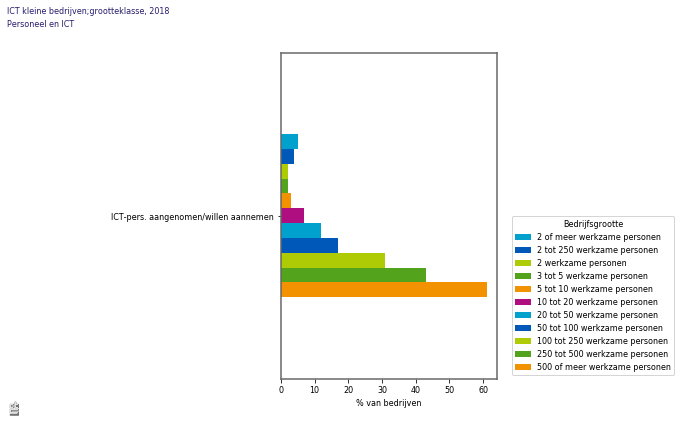

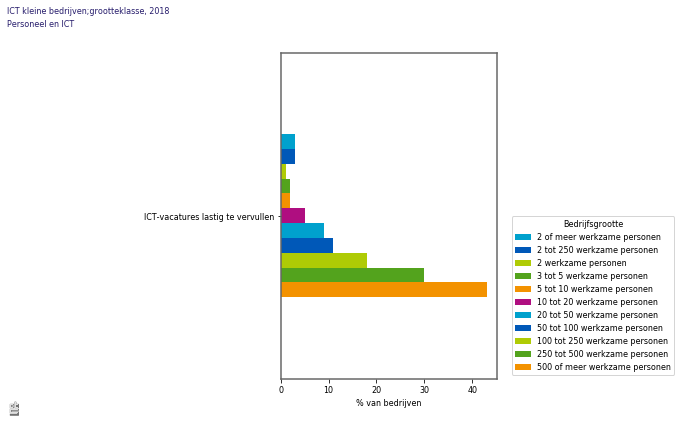

/opt/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)


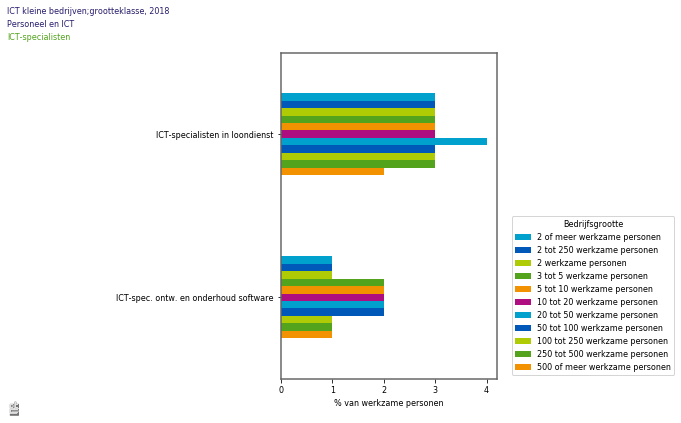

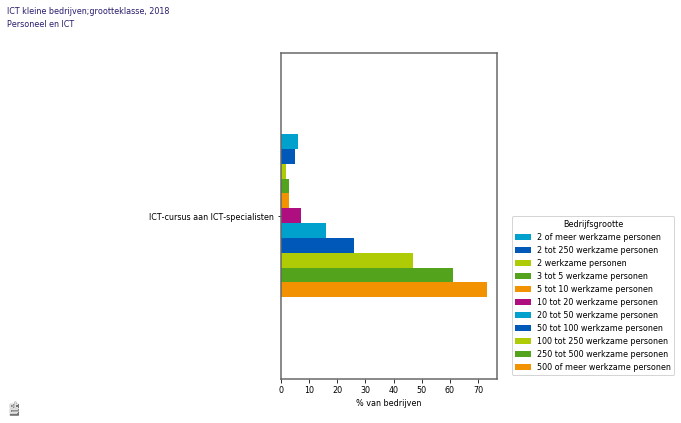

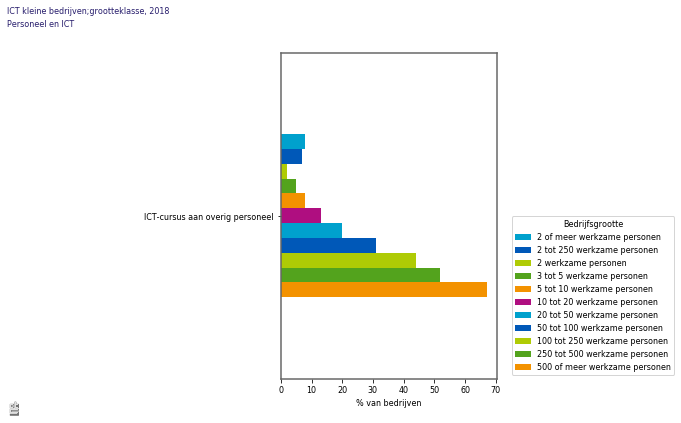

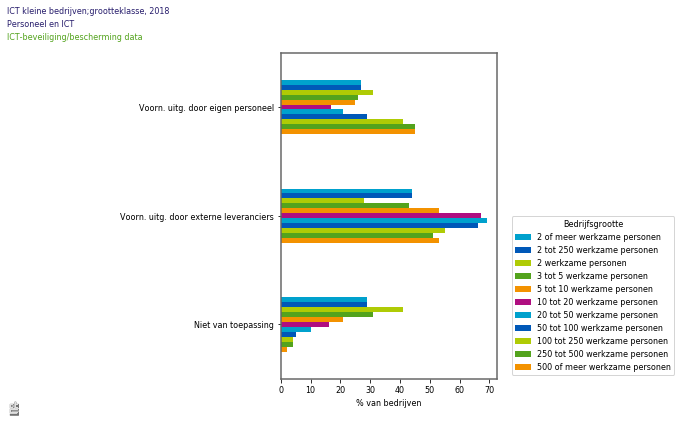

2019-09-18 11:50:25,058 | INFO : Processing module 13:


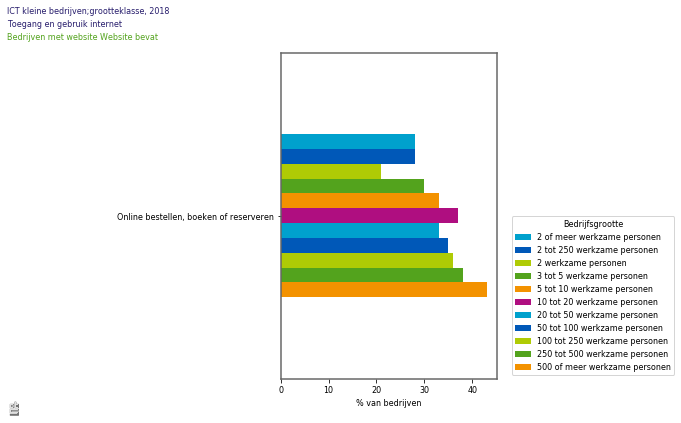

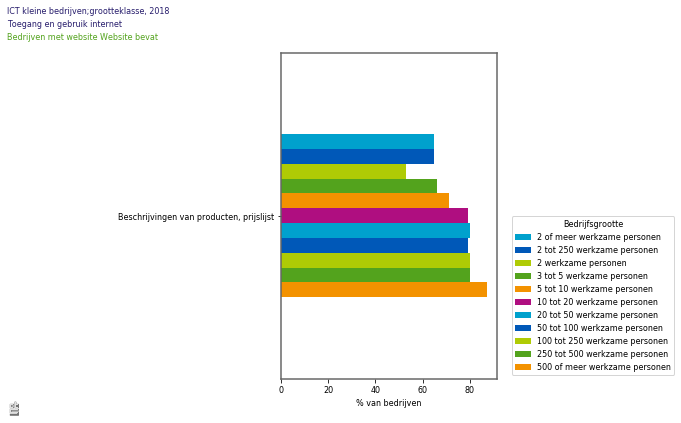

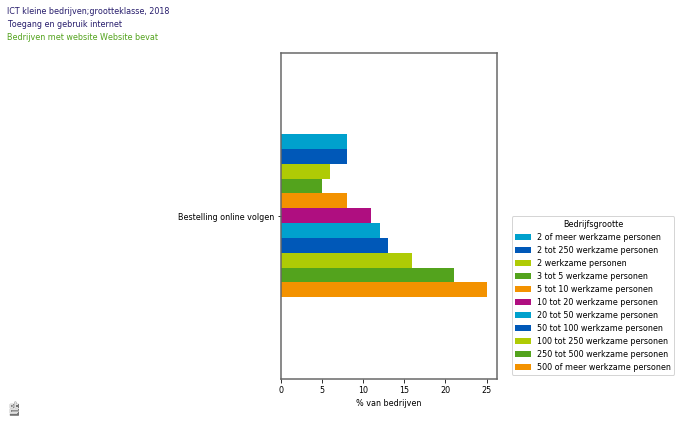

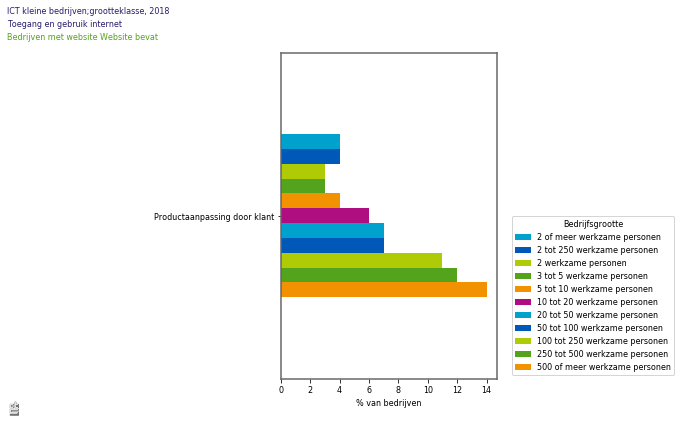

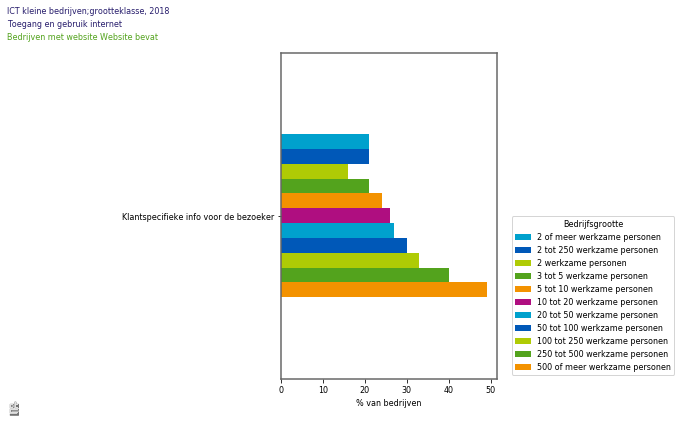

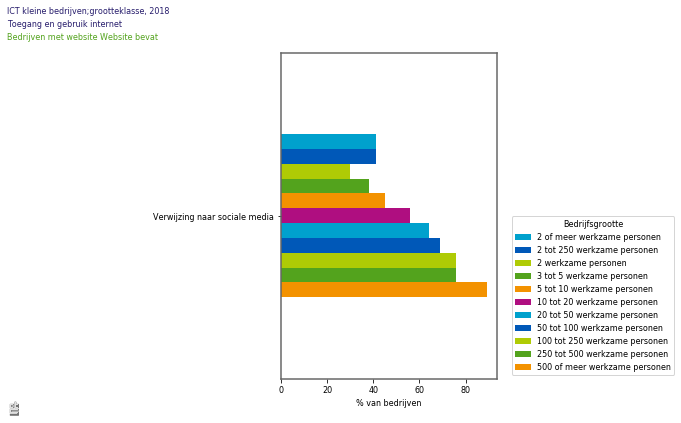

2019-09-18 11:50:28,255 | INFO : Processing module 23:


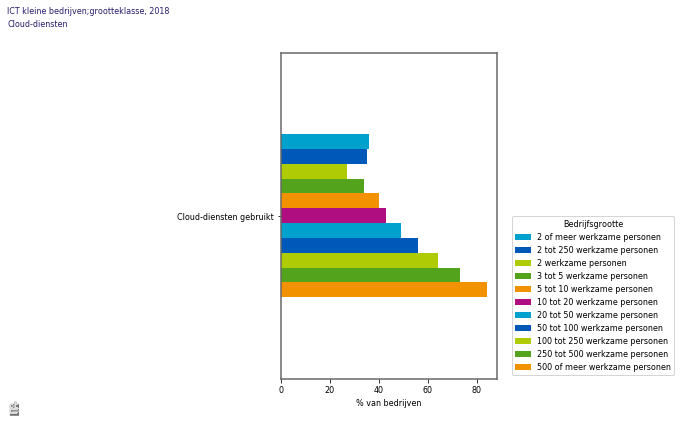

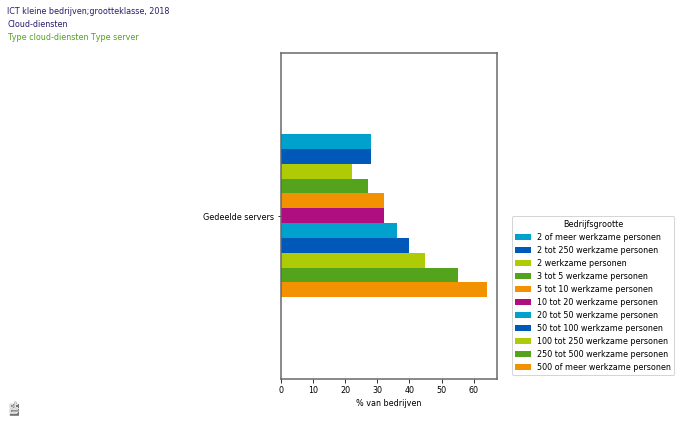

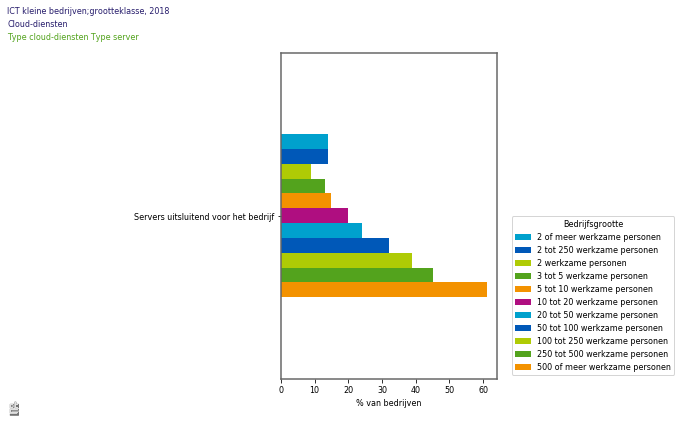

2019-09-18 11:50:29,999 | INFO : Processing module 36:


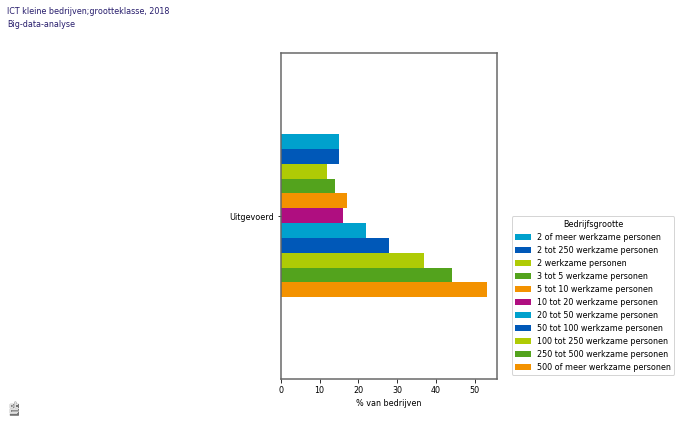

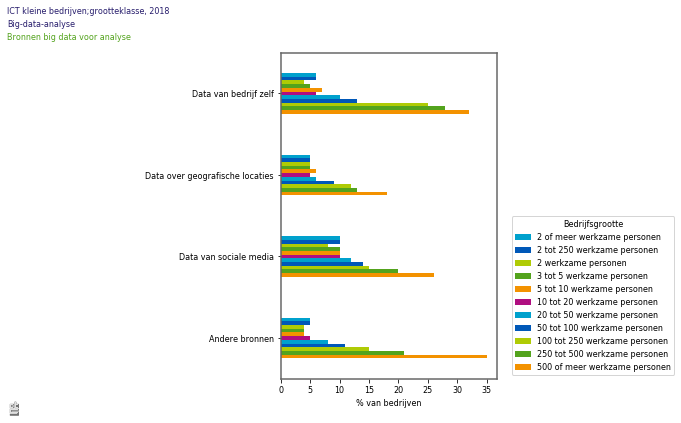

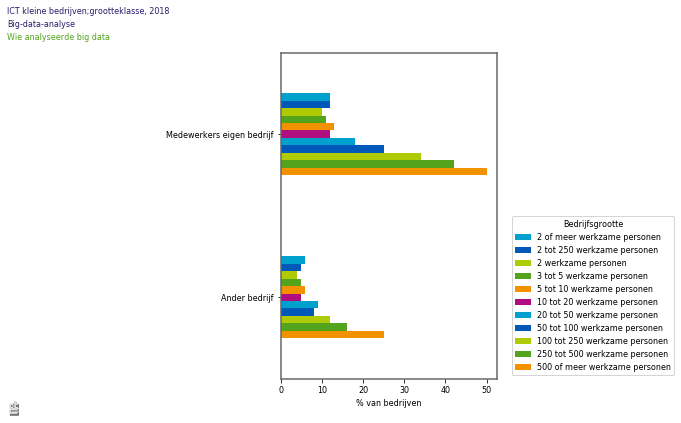

2019-09-18 11:50:31,937 | INFO : Processing module 46:


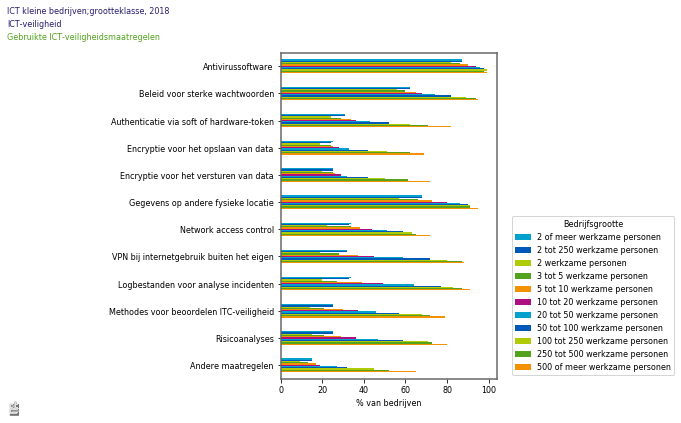

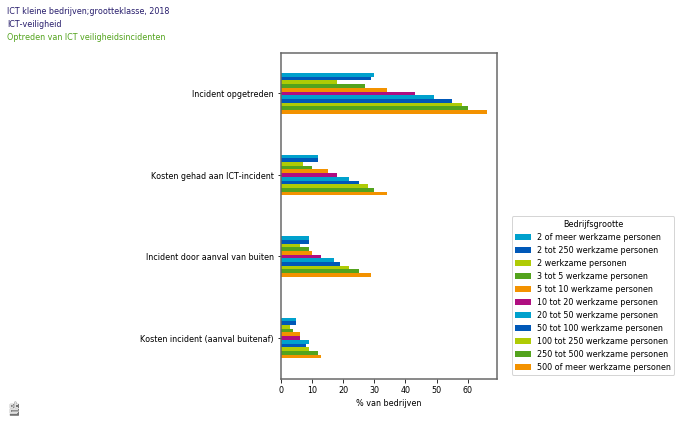

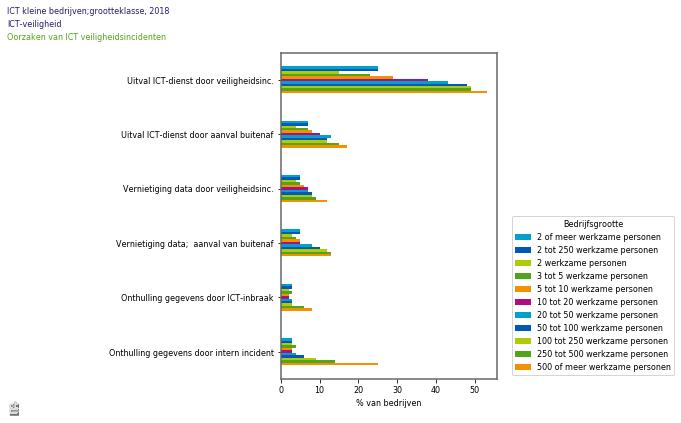

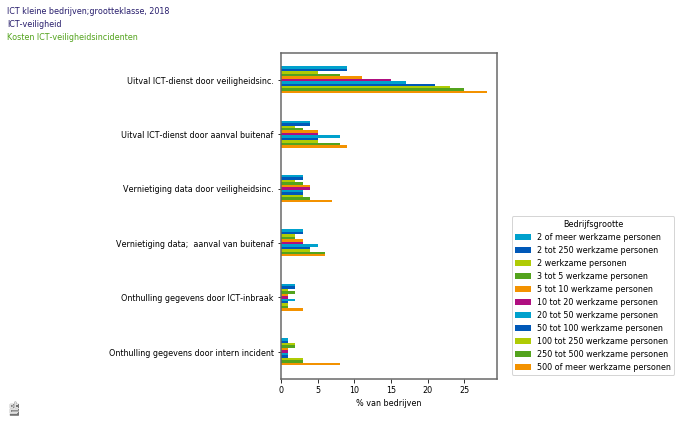

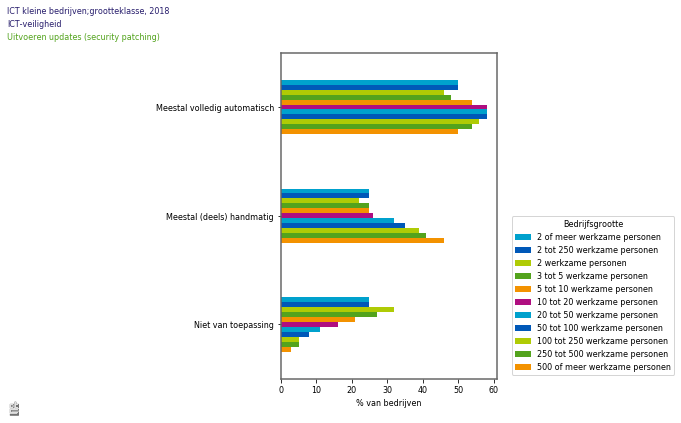

2019-09-18 11:50:36,674 | INFO : Processing module 83:


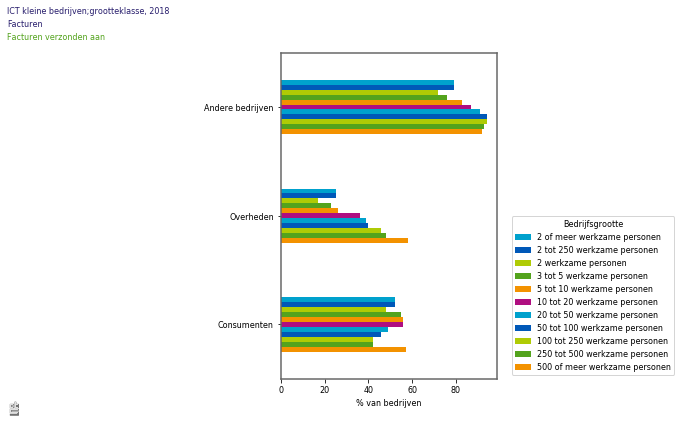

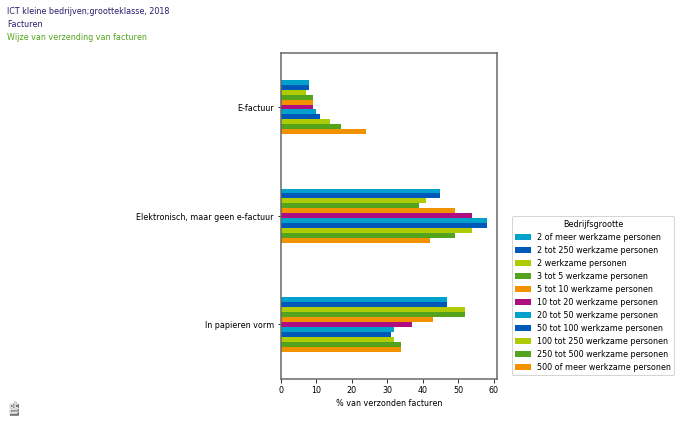

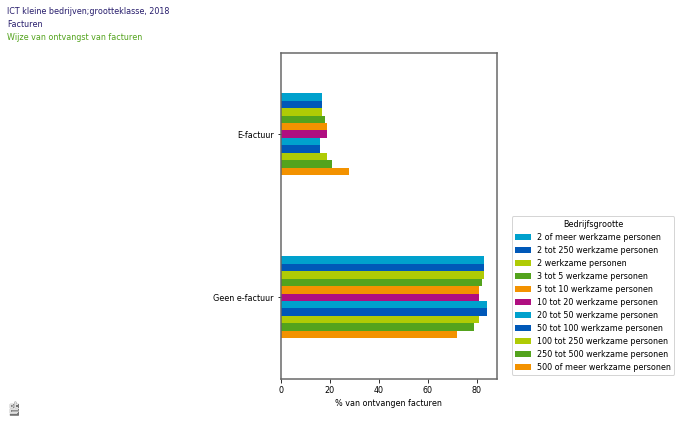

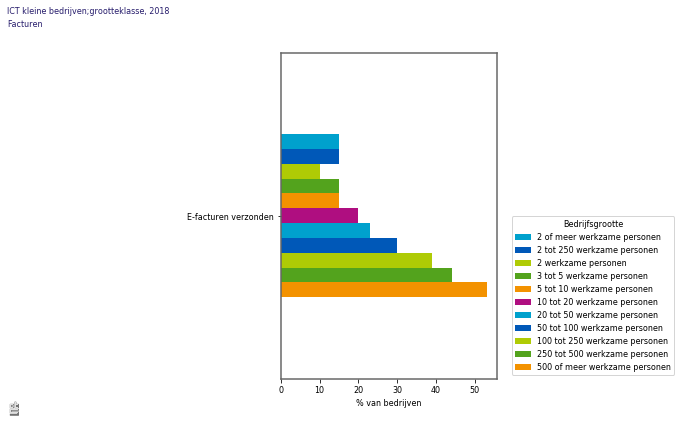

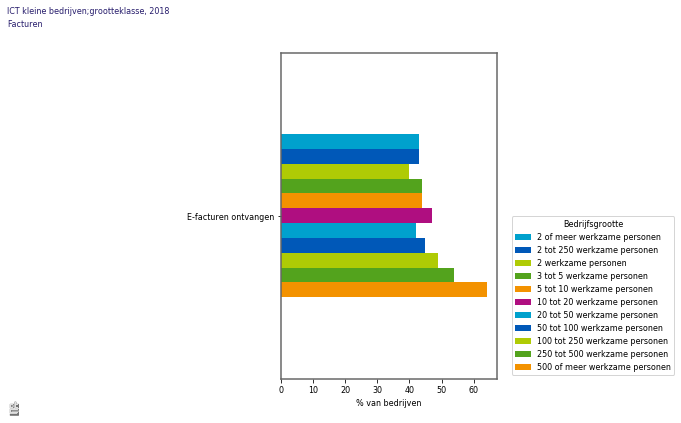

2019-09-18 11:50:39,317 | INFO : Processing module 97:


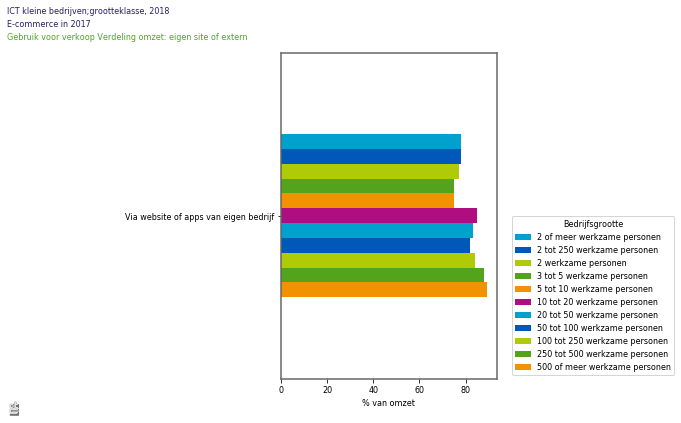

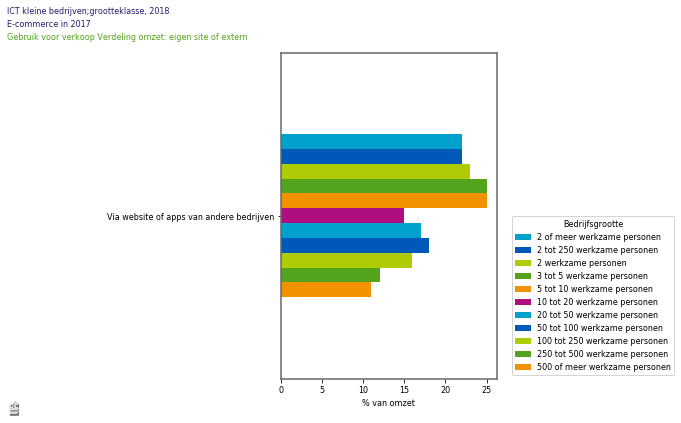

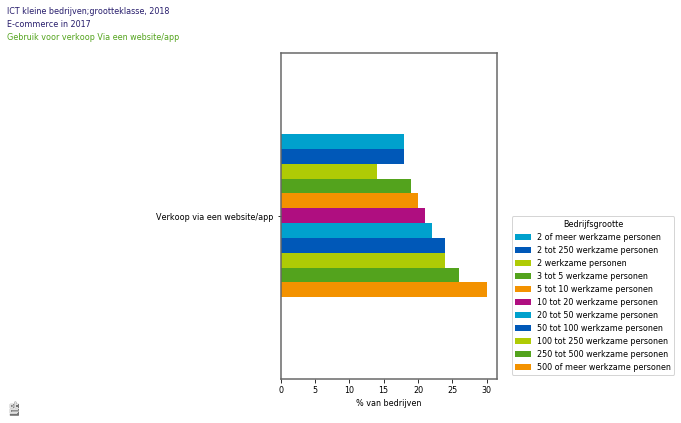

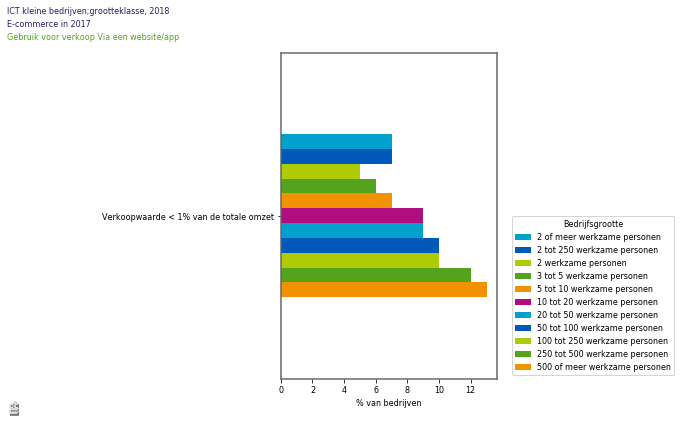

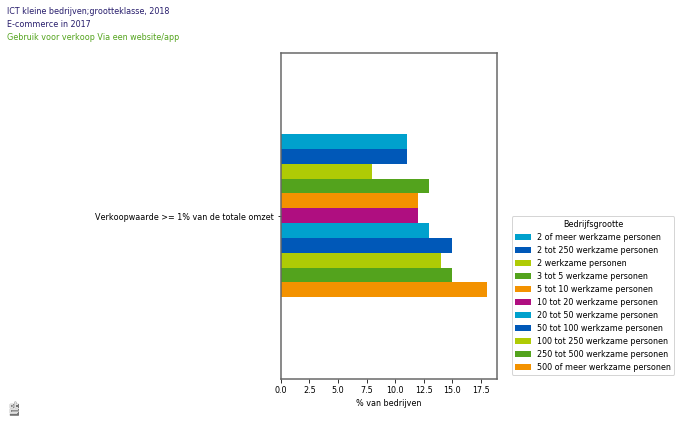

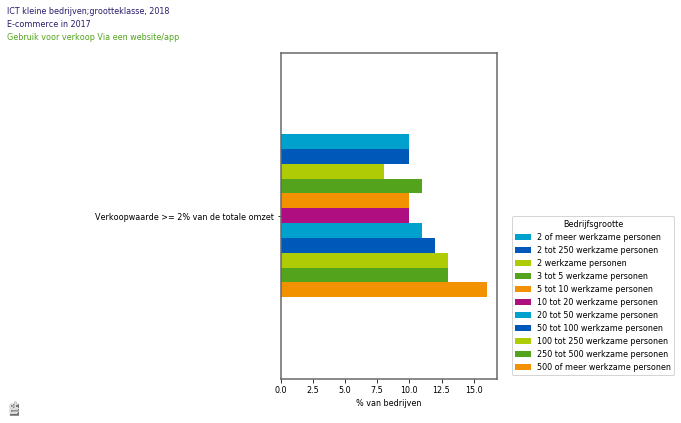

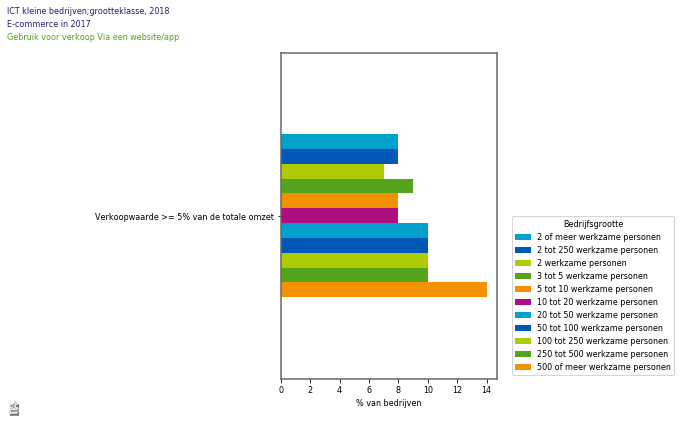

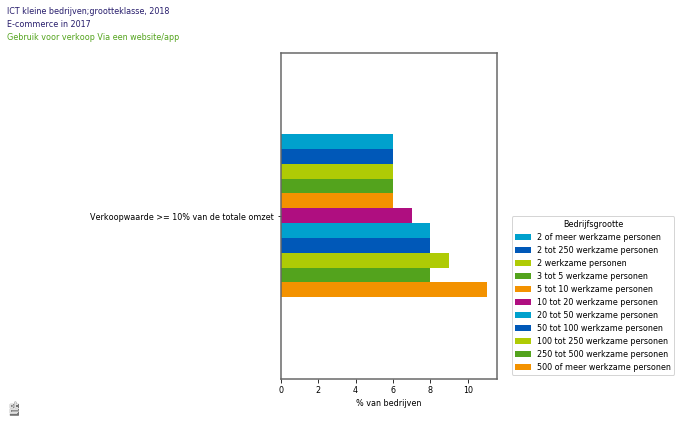

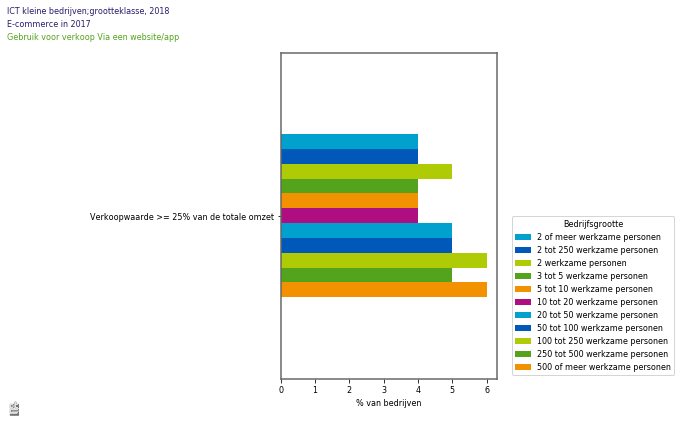

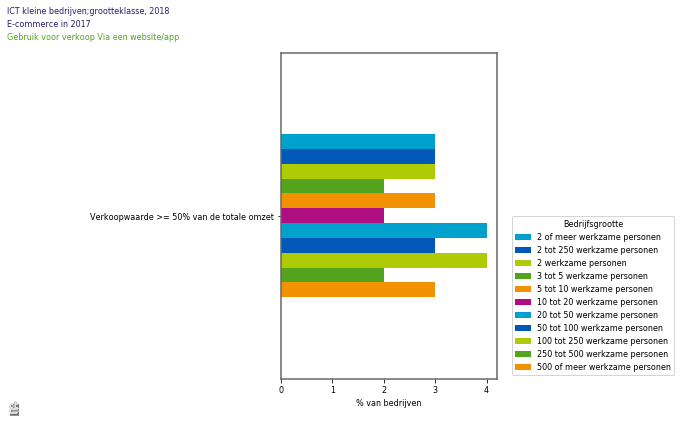

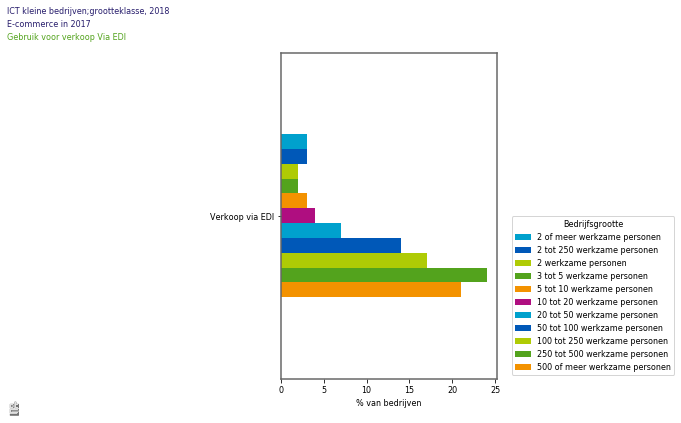

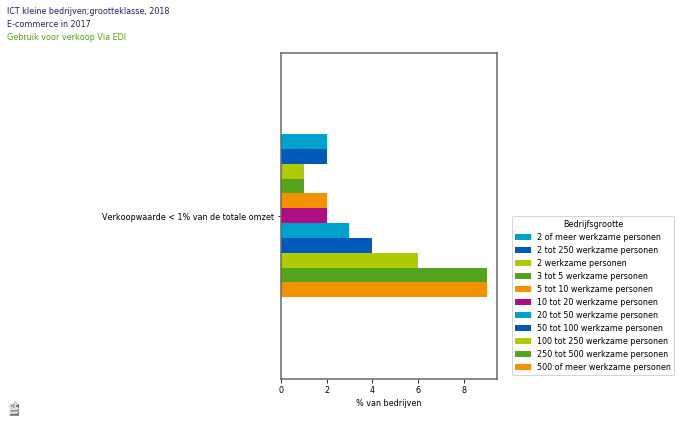

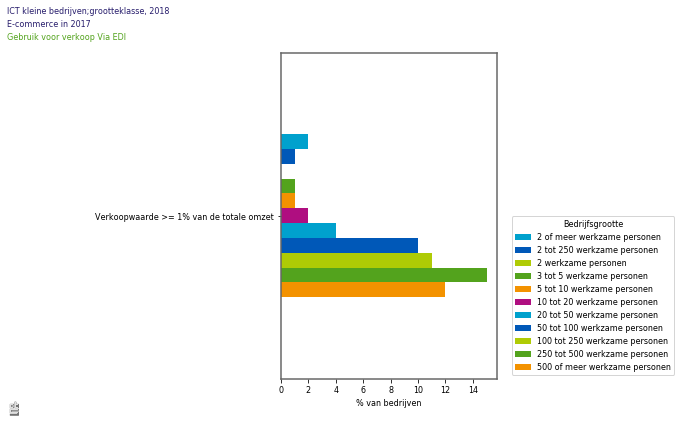

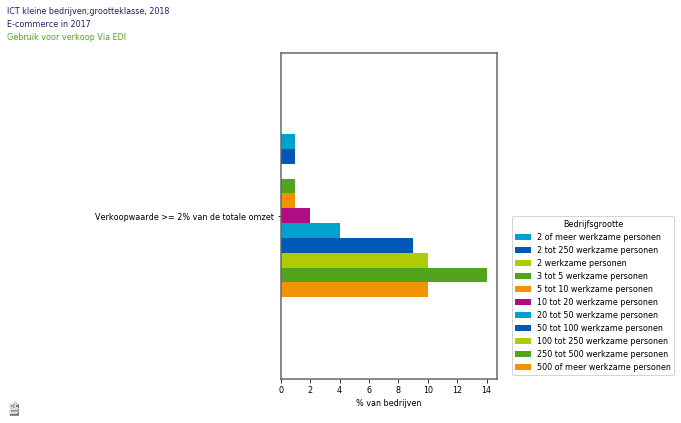

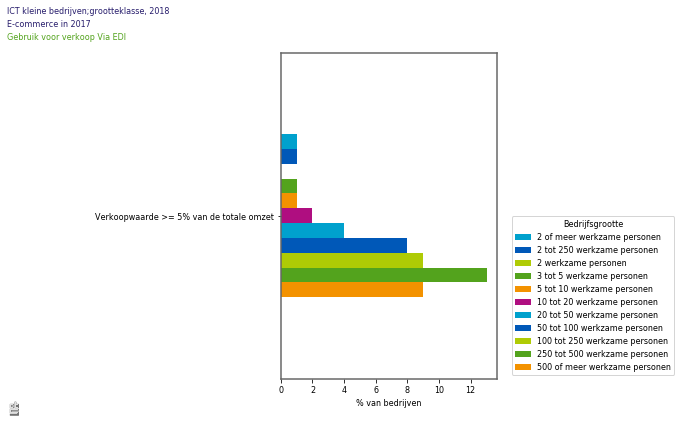

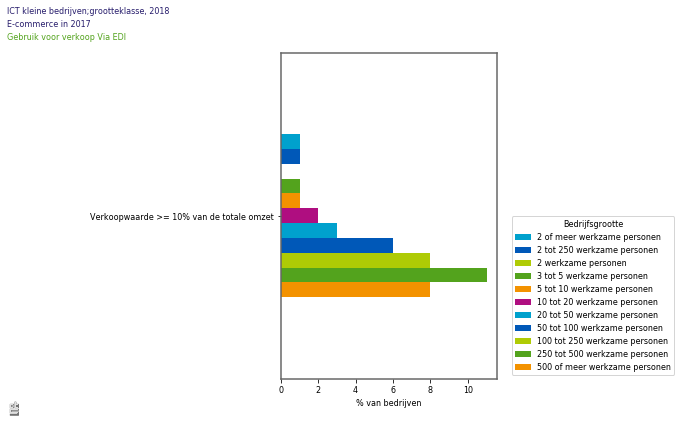

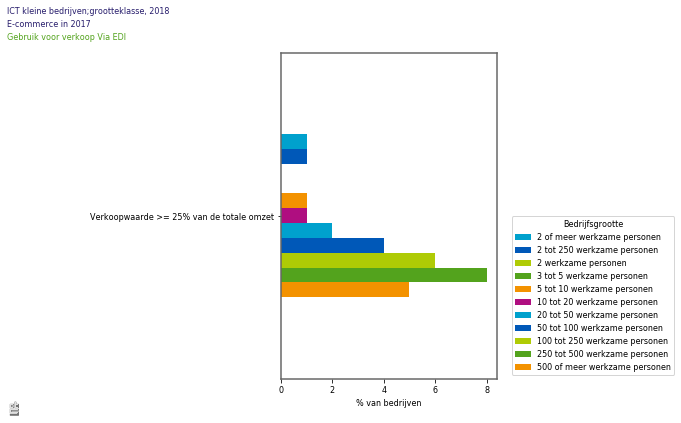

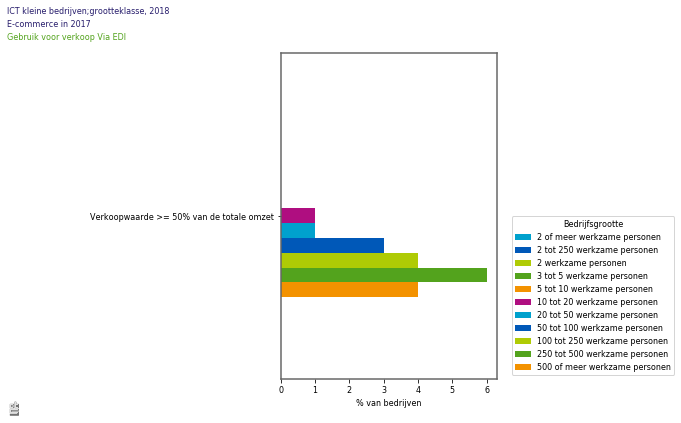

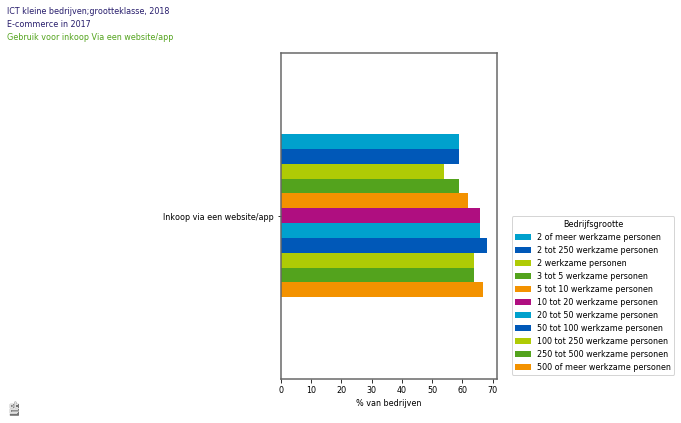

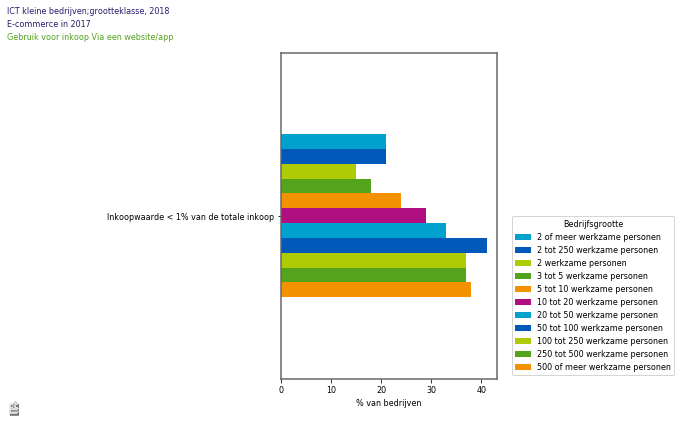

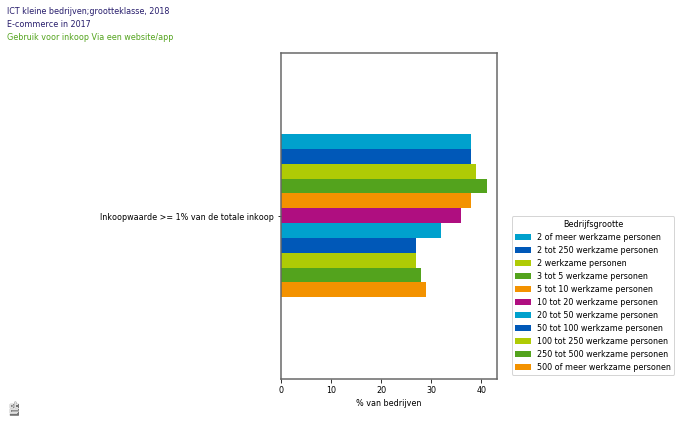

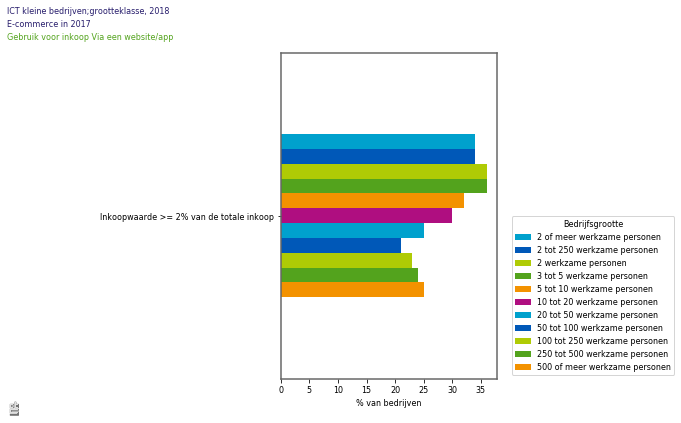

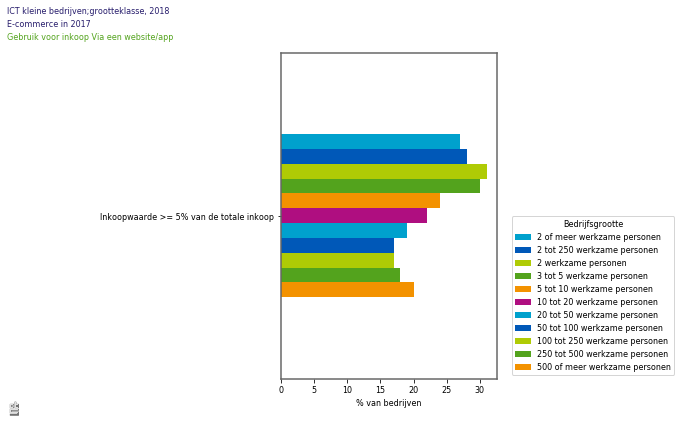

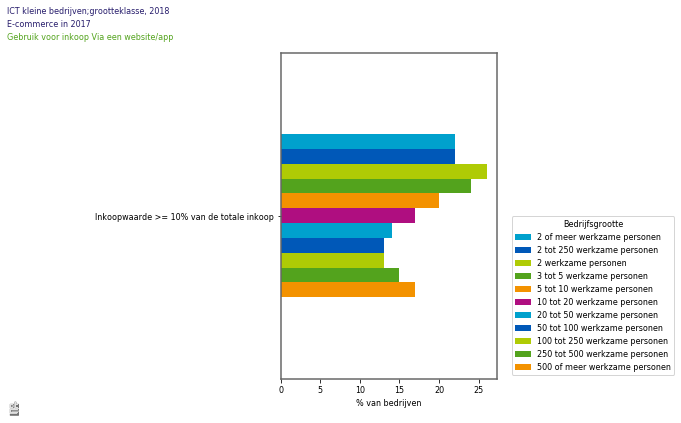

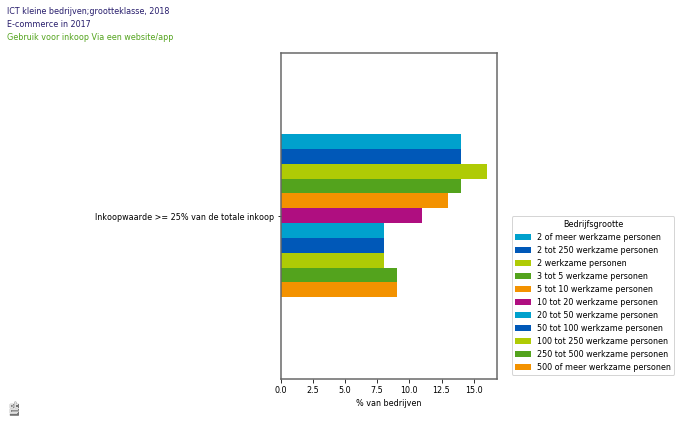

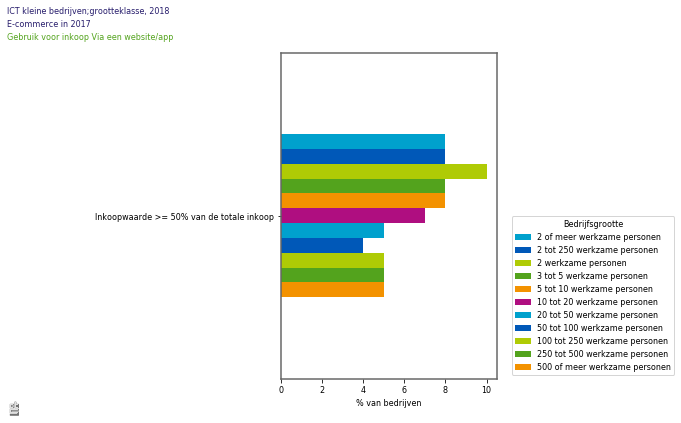

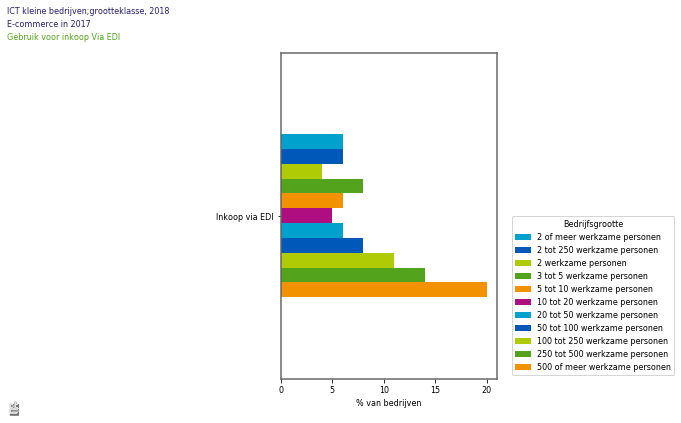

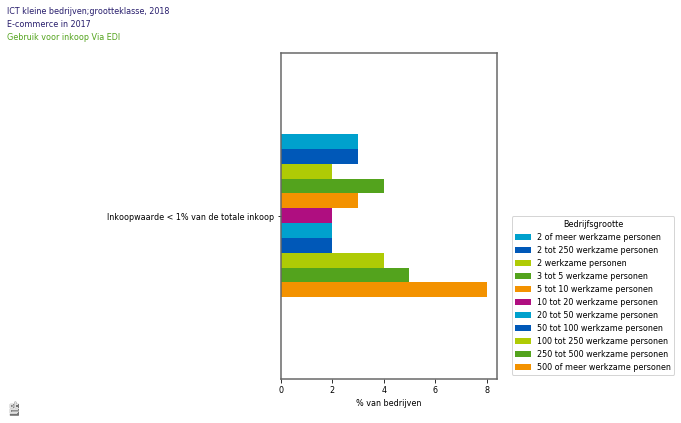

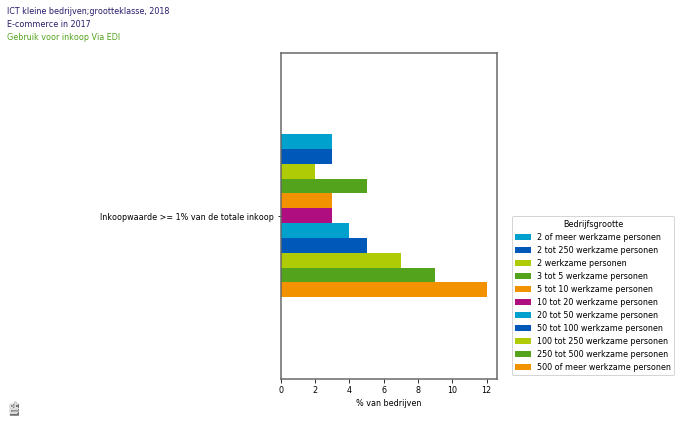

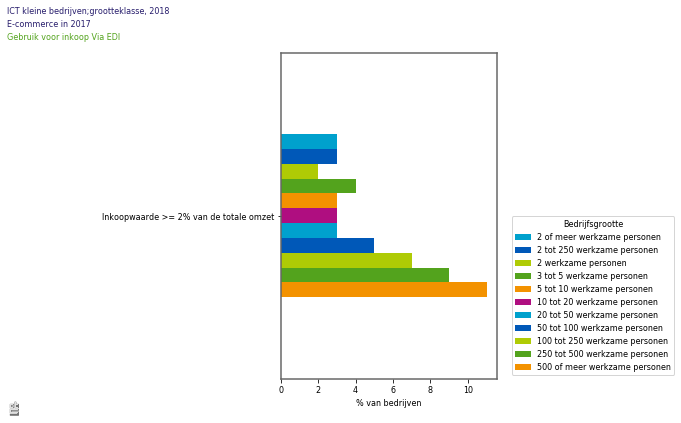

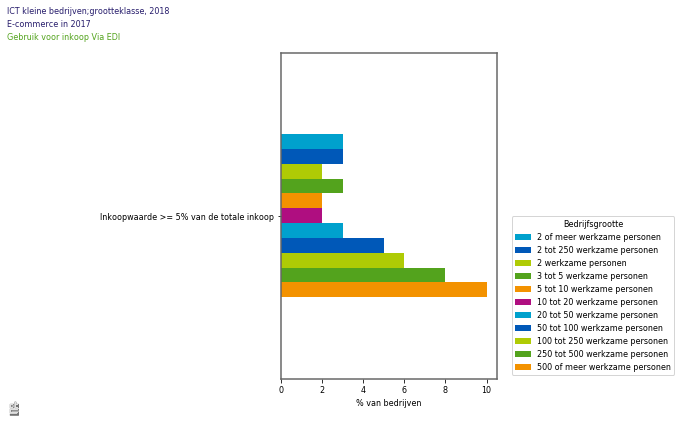

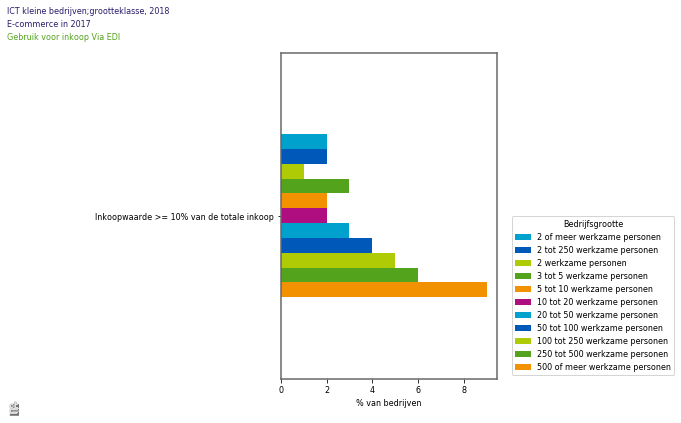

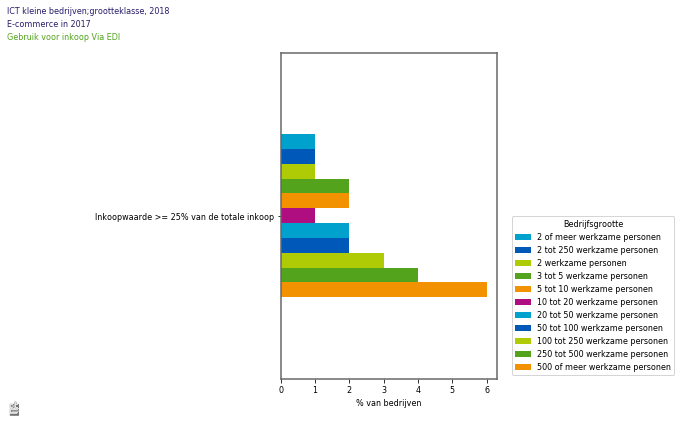

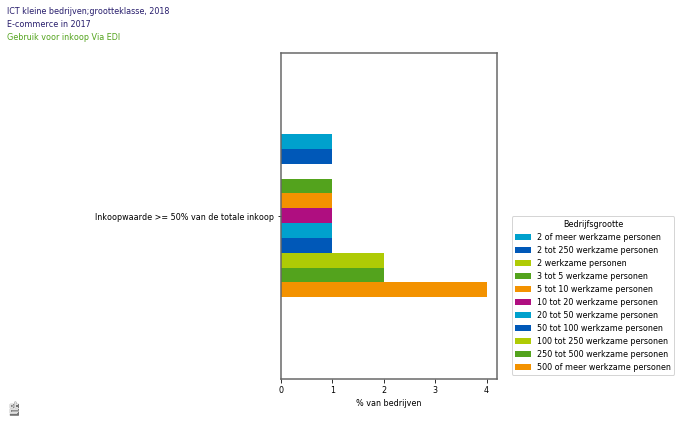

In [12]:
statline = StatLineTable(table_id=table_id, show_plot=True, make_the_plots=True)